In [38]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
%autoreload 2

In [51]:
import sys
sys.path.append("..")

#from exp import knn_raw, knn_diff, knn_dist_diff
from exp.knn_raw import knnRaw
from exp.knn_diff import knnDiff
from exp.knn_dist_diff import knnDistDiff
from utils import data

import sklearn
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [18]:
BASE_PATH = '../COVID-19/csse_covid_19_data/' 
confirmed = os.path.join(
    BASE_PATH, 
    'csse_covid_19_time_series',
    'time_series_covid19_confirmed_global.csv')
confirmed = data.load_csv_data(confirmed)

In [57]:
def plot_some(countries, confirmed):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111)
    cm = plt.get_cmap('jet')
    NUM_COLORS = len(countries)
    LINE_STYLES = ['solid', 'dashed', 'dotted']
    NUM_STYLES = len(LINE_STYLES)

    colors = [cm(i) for i in np.linspace(0, 1, NUM_COLORS)]
    legend = []
    handles = []

    for val in countries:
        df = data.filter_by_attribute(
            confirmed, "Country/Region", val)
        cases, labels = data.get_cases_chronologically(df)
        cases = cases.sum(axis=0)

        i = len(legend)
        lines = ax.plot(cases, label=labels[0,1])
        handles.append(lines[0])
        lines[0].set_linestyle(LINE_STYLES[i%NUM_STYLES])
        lines[0].set_color(colors[i])
        legend.append(labels[0, 1])

    ax.set_ylabel('# of confirmed cases')
    ax.set_xlabel("Time (days since Jan 22, 2020)")

    ax.set_yscale('log')
    ax.legend(handles, legend, bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4)
    plt.tight_layout()
    
    plt.show()

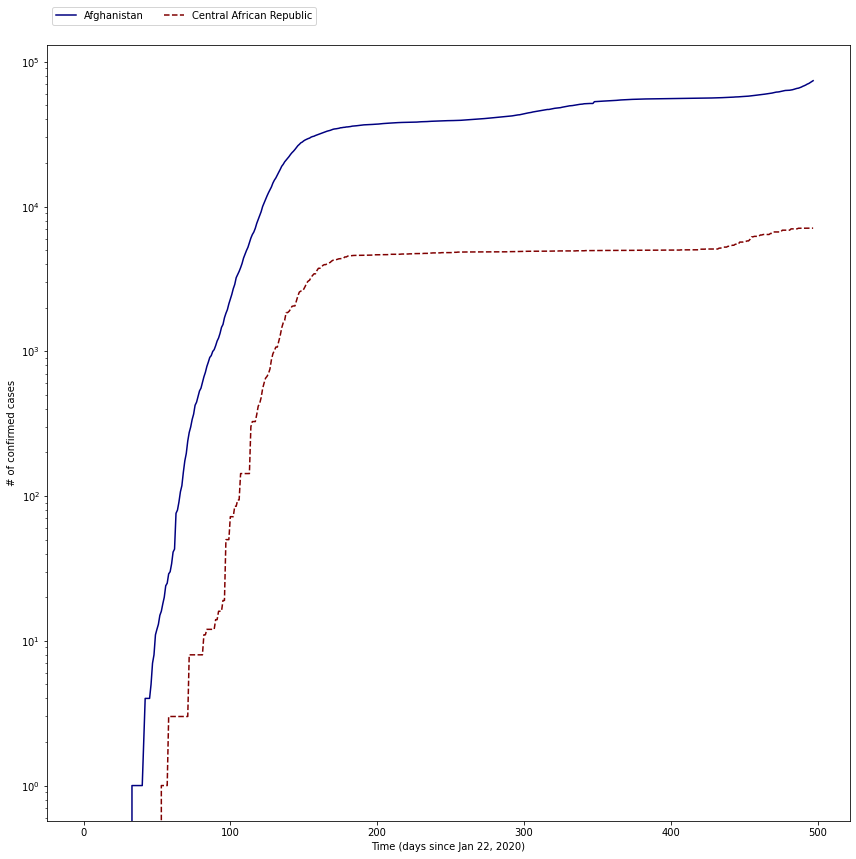

In [82]:
plot_some(["Afghanistan", "Central African Republic"], confirmed)

In [27]:
np.unique(confirmed["Country/Region"])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [98]:
def run_knn(alg, n_neighbors=5, min_cases=1000, normalize=True, n_bins=20):
    if alg == 'diff':
        knnDiff(n_neighbors, min_cases, normalize)
    elif alg == 'dist_diff':
        knnDistDiff(n_neighbors, min_cases, n_bins, normalize)
    elif alg == 'raw':
        knnRaw(n_neighbors, min_cases, normalize)
    else:
        print("Unrecognized:", alg)

In [99]:
run_knn('diff')

AAAAA


In [63]:
def get_neighbors(country, alg):
    result = os.path.join('..', 'exp', 'results', 'knn_' + alg + '.json')
    with open(result, 'r') as f:
        d = json.load(f)
        return d[country]

In [76]:
get_neighbors("Afghanistan", "dist_diff")

{'minkowski': ['China'], 'manhattan': ['China']}

In [79]:
def show_country(country, confirmed):
    neighbors = []
    raw = get_neighbors(country, 'raw')
    neighbors += [x[0] for x in raw.values()]
    print("Raw - minkowski:", raw['minkowski'][0])
    print("Raw - manhattan:", raw['manhattan'][0])
    
    diff = get_neighbors(country, 'diff')
    neighbors += [x[0] for x in diff.values()]
    print("Diff - minkowski:", diff['minkowski'][0])
    print("Diff - manhattan:", diff['manhattan'][0])
    
    dist_diff = get_neighbors(country, 'dist_diff')
    neighbors += [x[0] for x in dist_diff.values()]
    print("Dist_diff - minkowski:", dist_diff['minkowski'][0])
    print("Dist_diff - manhattan:", dist_diff['manhattan'][0])
    
    neighbors = list(set(neighbors)) # unique
    neighbors.append(country)
    plot_some(neighbors, confirmed)

In [107]:
run_knn('raw', n_neighbors=5)
run_knn('diff', n_neighbors=5)
run_knn('dist_diff', n_neighbors=5)

In [121]:
country = "Germany"
run_knn('diff', n_neighbors=2)
print(get_neighbors(country, 'diff'))
run_knn('diff', n_neighbors=5)
print(get_neighbors(country, 'diff'))
run_knn('diff', n_neighbors=10)
print(get_neighbors(country, 'diff'))
run_knn('diff', n_neighbors=20)
print(get_neighbors(country, 'diff'))

{'minkowski': ['Netherlands'], 'manhattan': ['Australia']}
{'minkowski': ['Croatia'], 'manhattan': ['Australia']}
{'minkowski': ['Netherlands'], 'manhattan': ['United Kingdom']}
{'minkowski': ['United Kingdom'], 'manhattan': ['United Kingdom']}


In [123]:
run_knn('diff', n_neighbors=50)
print(get_neighbors(country, 'diff'))

{'minkowski': ['Canada'], 'manhattan': ['France']}


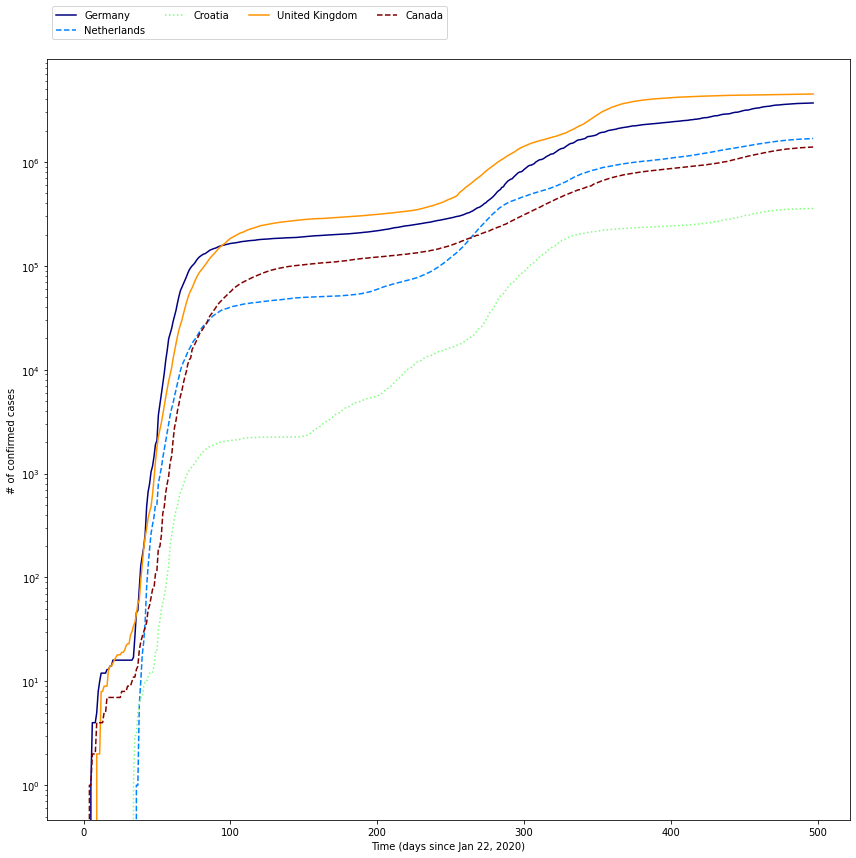

In [125]:
plot_some([country, "Netherlands", "Croatia", "United Kingdom", "Canada"], confirmed)